In [98]:
%%writefile README.md
    # Player analysis
    This notebook contains code for extracting and analyzing football player data, specifically comparing Bruno Fernandes and Kevin De Bruyne in the 2020-21 season.

    ## Data Sources
    *   Understat: Used to collect various statistics like goals, assists, shots, xG, etc.

    ## Methodology
    *   Web scraping with `BeautifulSoup` to extract data from Understat.
    *   Data cleaning and manipulation with `pandas`.
    *   Data visualization with `matplotlib`, `seaborn`, and `plotly`.
    *   Radar plots to compare player performance across different metrics.
    *   Scatter plots to visualize relationships between different variables (e.g., goals vs. shots).
    *   Heatmaps to visualize shot density on a football pitch.

    ## Key Insights
    *   (You can add key insights and findings from your analysis here)

Writing README.md


###2020-21 stats extraction




In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [2]:
a="https://understat.com/player/1228"
urlopen(a)
page=urlopen(a)
url=bs(page,"html.parser")
url
obj=url.findAll("script")[1].text
obj
start=obj.index("\\")
stop=obj.index("')")
obj=obj[start:stop]
obj
obj=obj.encode("utf8").decode("unicode_escape")
import json
p=json.loads(obj)["season"]
df18=pd.json_normalize(p)
df18
df18
df18.describe
df18.insert(0, "Player", "Bruno Fernandes")
print(df18)

            Player position games goals shots  time                  xG  \
0  Bruno Fernandes       FW     3     0     8   260  1.0354127269238234   
1  Bruno Fernandes       MC    35    10    95  3121  10.746266636997461   
2  Bruno Fernandes       MC    37     8    92  3326   9.385456696152687   
3  Bruno Fernandes      AMC    36    10    89  3135   9.285304862074554   
4  Bruno Fernandes      AMC    37    18   121  3117  16.019450719468296   
5  Bruno Fernandes      AMC    14     8    44  1211    5.98607742600143   
6  Bruno Fernandes      Sub    33     5    62  1736   5.761577281169593   
7  Bruno Fernandes       MC    31     3    52  2116    3.79332700651139   
8  Bruno Fernandes      Sub    31     3    41  1605   2.634341513738036   

  assists                  xA key_passes season               team yellow red  \
0       0  0.6183691620826721          3   2024  Manchester United      0   0   
1       8   13.15852378681302        113   2023  Manchester United      9   0   
2     

In [5]:
a="https://understat.com/player/447"
urlopen(a)
page=urlopen(a)
url=bs(page,"html.parser")
url
obj=url.findAll("script")[1].text
obj
start=obj.index("\\")
stop=obj.index("')")
obj=obj[start:stop]
obj
obj=obj.encode("utf8").decode("unicode_escape")
import json
p=json.loads(obj)["season"]
df17=pd.json_normalize(p)
df17
df17
df17.describe
df17.insert(0, "Player", "Kevin De Bruyne")
print(df17)

             Player position games goals shots  time                  xG  \
0   Kevin De Bruyne      AMC     3     1    12   270  0.9135028496384621   
1   Kevin De Bruyne      DMC    18     4    44  1233  2.5787349939346313   
2   Kevin De Bruyne       MC    32     7    65  2448  4.7582743894308805   
3   Kevin De Bruyne      Sub    30    15    78  2214  5.9499644339084625   
4   Kevin De Bruyne      AMC    25     6    81  2008   9.983444157987833   
5   Kevin De Bruyne       MC    35    14   100  2818   8.106427356600761   
6   Kevin De Bruyne      Sub    19     2    31   965  1.4742405684664845   
7   Kevin De Bruyne       MC    37     8    93  3103    5.40172931086272   
8   Kevin De Bruyne      AMC    36     6    86  2893   6.771996311843395   
9   Kevin De Bruyne       ML    25     7    49  2006   4.308095835149288   
10  Kevin De Bruyne      AML     2     0     4   168  0.8674142882227898   
11  Kevin De Bruyne      AML    34    10    96  3052   7.724068632349372   

   assists 

In [33]:
joint = pd.concat([df17, df18], ignore_index=True)
joint

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Kevin De Bruyne,AMC,3,1,12,270,0.9135028496384621,1,1.7832636088132858,11,2024,Manchester City,1,0,1,0.9135028496384621,2.880602389574051,1.4461247324943542
1,Kevin De Bruyne,DMC,18,4,44,1233,2.5787349939346313,10,11.979073725640774,58,2023,Manchester City,2,0,4,2.5787349939346313,15.635810784995556,7.777100384235382
2,Kevin De Bruyne,MC,32,7,65,2448,4.7582743894308805,16,16.31964398175478,97,2022,Manchester City,1,0,7,4.7582743894308805,29.12851269170642,16.633560817688704
3,Kevin De Bruyne,Sub,30,15,78,2214,5.9499644339084625,8,11.260171007364988,87,2021,Manchester City,2,0,15,5.9499644339084625,20.317838434129953,9.413898749276996
4,Kevin De Bruyne,AMC,25,6,81,2008,9.983444157987833,12,10.958204975351691,79,2020,Manchester City,1,0,4,7.699938114732504,22.516895599663258,11.297135788947344
5,Kevin De Bruyne,MC,35,14,100,2818,8.106427356600761,20,20.620712891221046,133,2019,Manchester City,3,0,12,6.5840903371572495,37.79830400645733,19.244827073067427
6,Kevin De Bruyne,Sub,19,2,31,965,1.4742405684664845,2,6.654018055647612,36,2018,Manchester City,2,0,2,1.4742405684664845,12.202191635966301,8.481837928295135
7,Kevin De Bruyne,MC,37,8,93,3103,5.40172931086272,16,13.101718165911734,105,2017,Manchester City,2,0,8,5.40172931086272,33.50092287361622,22.899969128891826
8,Kevin De Bruyne,AMC,36,6,86,2893,6.771996311843395,18,15.888654900714755,103,2016,Manchester City,4,0,6,6.010865323245525,28.54269857145846,15.754017719998956
9,Kevin De Bruyne,ML,25,7,49,2006,4.308095835149288,9,8.33203162252903,81,2015,Manchester City,2,0,7,4.308095835149288,16.136462956666946,8.064566018991172


In [8]:
joint.shape

(21, 18)

In [9]:
joint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      21 non-null     object
 1   position    21 non-null     object
 2   games       21 non-null     object
 3   goals       21 non-null     object
 4   shots       21 non-null     object
 5   time        21 non-null     object
 6   xG          21 non-null     object
 7   assists     21 non-null     object
 8   xA          21 non-null     object
 9   key_passes  21 non-null     object
 10  season      21 non-null     object
 11  team        21 non-null     object
 12  yellow      21 non-null     object
 13  red         21 non-null     object
 14  npg         21 non-null     object
 15  npxG        21 non-null     object
 16  xGChain     21 non-null     object
 17  xGBuildup   21 non-null     object
dtypes: object(18)
memory usage: 3.1+ KB


In [10]:
joint=joint.apply(pd.to_numeric,errors="ignore")

In [11]:
joint

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Kevin De Bruyne,AMC,3,1,12,270,0.913503,1,1.783264,11,2024,Manchester City,1,0,1,0.913503,2.880602,1.446125
1,Kevin De Bruyne,DMC,18,4,44,1233,2.578735,10,11.979074,58,2023,Manchester City,2,0,4,2.578735,15.635811,7.777100
2,Kevin De Bruyne,MC,32,7,65,2448,4.758274,16,16.319644,97,2022,Manchester City,1,0,7,4.758274,29.128513,16.633561
3,Kevin De Bruyne,Sub,30,15,78,2214,5.949964,8,11.260171,87,2021,Manchester City,2,0,15,5.949964,20.317838,9.413899
4,Kevin De Bruyne,AMC,25,6,81,2008,9.983444,12,10.958205,79,2020,Manchester City,1,0,4,7.699938,22.516896,11.297136
5,Kevin De Bruyne,MC,35,14,100,2818,8.106427,20,20.620713,133,2019,Manchester City,3,0,12,6.584090,37.798304,19.244827
6,Kevin De Bruyne,Sub,19,2,31,965,1.474241,2,6.654018,36,2018,Manchester City,2,0,2,1.474241,12.202192,8.481838
7,Kevin De Bruyne,MC,37,8,93,3103,5.401729,16,13.101718,105,2017,Manchester City,2,0,8,5.401729,33.500923,22.899969
8,Kevin De Bruyne,AMC,36,6,86,2893,6.771996,18,15.888655,103,2016,Manchester City,4,0,6,6.010865,28.542699,15.754018
9,Kevin De Bruyne,ML,25,7,49,2006,4.308096,9,8.332032,81,2015,Manchester City,2,0,7,4.308096,16.136463,8.064566


In [12]:

joint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      21 non-null     object 
 1   position    21 non-null     object 
 2   games       21 non-null     int64  
 3   goals       21 non-null     int64  
 4   shots       21 non-null     int64  
 5   time        21 non-null     int64  
 6   xG          21 non-null     float64
 7   assists     21 non-null     int64  
 8   xA          21 non-null     float64
 9   key_passes  21 non-null     int64  
 10  season      21 non-null     int64  
 11  team        21 non-null     object 
 12  yellow      21 non-null     int64  
 13  red         21 non-null     int64  
 14  npg         21 non-null     int64  
 15  npxG        21 non-null     float64
 16  xGChain     21 non-null     float64
 17  xGBuildup   21 non-null     float64
dtypes: float64(5), int64(10), object(3)
memory usage: 3.1+ KB


In [13]:
joint


,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Kevin De Bruyne,AMC,3,1,12,270,0.913503,1,1.783264,11,2024,Manchester City,1,0,1,0.913503,2.880602,1.446125
1,Kevin De Bruyne,DMC,18,4,44,1233,2.578735,10,11.979074,58,2023,Manchester City,2,0,4,2.578735,15.635811,7.777100
2,Kevin De Bruyne,MC,32,7,65,2448,4.758274,16,16.319644,97,2022,Manchester City,1,0,7,4.758274,29.128513,16.633561
3,Kevin De Bruyne,Sub,30,15,78,2214,5.949964,8,11.260171,87,2021,Manchester City,2,0,15,5.949964,20.317838,9.413899
4,Kevin De Bruyne,AMC,25,6,81,2008,9.983444,12,10.958205,79,2020,Manchester City,1,0,4,7.699938,22.516896,11.297136
5,Kevin De Bruyne,MC,35,14,100,2818,8.106427,20,20.620713,133,2019,Manchester City,3,0,12,6.584090,37.798304,19.244827
6,Kevin De Bruyne,Sub,19,2,31,965,1.474241,2,6.654018,36,2018,Manchester City,2,0,2,1.474241,12.202192,8.481838
7,Kevin De Bruyne,MC,37,8,93,3103,5.401729,16,13.101718,105,2017,Manchester City,2,0,8,5.401729,33.500923,22.899969
8,Kevin De Bruyne,AMC,36,6,86,2893,6.771996,18,15.888655,103,2016,Manchester City,4,0,6,6.010865,28.542699,15.754018
9,Kevin De Bruyne,ML,25,7,49,2006,4.308096,9,8.332032,81,2015,Manchester City,2,0,7,4.308096,16.136463,8.064566


In [34]:
joint_data=joint.loc[(joint["season"]==2020)]

In [35]:
joint_data

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup


In [36]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      0 non-null      object
 1   position    0 non-null      object
 2   games       0 non-null      object
 3   goals       0 non-null      object
 4   shots       0 non-null      object
 5   time        0 non-null      object
 6   xG          0 non-null      object
 7   assists     0 non-null      object
 8   xA          0 non-null      object
 9   key_passes  0 non-null      object
 10  season      0 non-null      object
 11  team        0 non-null      object
 12  yellow      0 non-null      object
 13  red         0 non-null      object
 14  npg         0 non-null      object
 15  npxG        0 non-null      object
 16  xGChain     0 non-null      object
 17  xGBuildup   0 non-null      object
dtypes: object(18)
memory usage: 0.0+ bytes


# Shot Data extraction


In [37]:
import json
import pandas as pd
from bs4 import BeautifulSoup as bs



In [38]:

a="https://understat.com/player/447"
page=urlopen(a)
url=bs(page,"html.parser")
obj=url.findAll("script")[3].text
obj
start=obj.index("\\")
stop=obj.index("')")
obj=obj[start:stop]
obj
obj=obj.encode("utf8").decode("unicode_escape")
import json
p=json.loads(obj)
shots17=pd.json_normalize(p)
print(shots17)


         id minute       result                   X                    Y  \
0     24352     57    SavedShot  0.8180000305175781   0.6930000305175781   
1     24611     42    SavedShot  0.7190000152587891   0.6930000305175781   
2     24619     63    SavedShot                0.88   0.7630000305175781   
3     24902     23    SavedShot  0.7480000305175781   0.7380000305175781   
4     24903     24    SavedShot  0.8130000305175781                0.785   
..      ...    ...          ...                 ...                  ...   
734  589402     12    SavedShot                0.89   0.8119999694824219   
735  589403     17   ShotOnPost                0.85   0.4590000152587891   
736  589406     21    SavedShot  0.8419999694824218   0.7119999694824218   
737  589414     44  MissedShots   0.769000015258789  0.36400001525878906   
738  589422     66  BlockedShot   0.710999984741211                0.605   

                       xG           player h_a player_id       situation  \
0     0.019

In [39]:
url.findAll("script")[4].text

"\n\tvar matchesData\t= JSON.parse('\\x5B\\x7B\\x22goals\\x22\\x3A\\x220\\x22,\\x22shots\\x22\\x3A\\x226\\x22,\\x22xG\\x22\\x3A\\x220.3218279480934143\\x22,\\x22time\\x22\\x3A\\x2290\\x22,\\x22position\\x22\\x3A\\x22AMC\\x22,\\x22h_team\\x22\\x3A\\x22West\\x20Ham\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22h_goals\\x22\\x3A\\x221\\x22,\\x22a_goals\\x22\\x3A\\x223\\x22,\\x22date\\x22\\x3A\\x222024\\x2D08\\x2D31\\x22,\\x22id\\x22\\x3A\\x2226628\\x22,\\x22season\\x22\\x3A\\x222024\\x22,\\x22roster_id\\x22\\x3A\\x22672024\\x22,\\x22xA\\x22\\x3A\\x220.7267962694168091\\x22,\\x22assists\\x22\\x3A\\x220\\x22,\\x22key_passes\\x22\\x3A\\x226\\x22,\\x22npg\\x22\\x3A\\x220\\x22,\\x22npxG\\x22\\x3A\\x220.3218279480934143\\x22,\\x22xGChain\\x22\\x3A\\x220.958245575428009\\x22,\\x22xGBuildup\\x22\\x3A\\x220.640308678150177\\x22\\x7D,\\x7B\\x22goals\\x22\\x3A\\x221\\x22,\\x22shots\\x22\\x3A\\x224\\x22,\\x22xG\\x22\\x3A\\x220.5035793781280518\\x22,\\x22time\\x22\\x3A\\x2290\\x22,\\x22

In [40]:
shots17=shots17.apply(pd.to_numeric,errors="ignore")

In [41]:
shots17=shots17.loc[(shots17["season"]==2020)]

In [42]:
shots17.shape

(81, 20)

In [43]:
shots17

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
459,378527,10,SavedShot,0.739,0.617,0.049663,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
460,378529,19,Goal,0.885,0.500,0.761169,Kevin De Bruyne,a,447,Penalty,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
461,378534,42,SavedShot,0.903,0.633,0.244169,Kevin De Bruyne,a,447,OpenPlay,2020,LeftFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,Gabriel Jesus,BallRecovery
462,378546,79,SavedShot,0.666,0.771,0.023168,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
463,379609,45,MissedShots,0.829,0.661,0.042790,Kevin De Bruyne,h,447,OpenPlay,2020,LeftFoot,14112,Manchester City,Leicester,2,5,2020-09-27 15:30:00,Riyad Mahrez,BallRecovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,409512,58,Goal,0.862,0.498,0.471965,Kevin De Bruyne,h,447,OpenPlay,2020,RightFoot,14761,Manchester City,Southampton,5,2,2021-03-10 18:00:00,Phil Foden,Pass
536,412756,22,ShotOnPost,0.783,0.663,0.067456,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14730,Leicester,Manchester City,0,2,2021-04-03 16:30:00,None,Standard
537,412759,41,MissedShots,0.754,0.506,0.022649,Kevin De Bruyne,a,447,OpenPlay,2020,RightFoot,14730,Leicester,Manchester City,0,2,2021-04-03 16:30:00,Rodri,Pass
538,424074,10,Goal,0.768,0.620,0.024201,Kevin De Bruyne,h,447,OpenPlay,2020,RightFoot,14811,Manchester City,Everton,5,0,2021-05-23 15:00:00,Riyad Mahrez,Pass


In [44]:
shots17.describe()

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.0,81.000000,81.000000,81.000000
mean,395014.888889,45.432099,0.828852,0.525284,0.123252,447.0,2020.0,14541.740741,1.703704,1.024691
std,10744.100895,25.039937,0.067554,0.136756,0.181818,0.0,0.0,178.247144,1.536591,1.172341
min,378527.000000,2.000000,0.664000,0.032000,0.010289,447.0,2020.0,14089.000000,0.000000,0.000000
25%,387537.000000,24.000000,0.775000,0.418000,0.029382,447.0,2020.0,14511.000000,1.000000,0.000000
50%,392733.000000,47.000000,0.829000,0.537000,0.055503,447.0,2020.0,14564.000000,1.000000,1.000000
75%,399957.000000,63.000000,0.885000,0.627000,0.085186,447.0,2020.0,14621.000000,2.000000,1.000000
max,424077.000000,95.000000,0.961000,0.845000,0.761169,447.0,2020.0,14811.000000,5.000000,5.000000


In [45]:
a="https://understat.com/player/1228"
page=urlopen(a)
url=bs(page,"html.parser")
obj=url.findAll("script")[3].text
obj
start=obj.index("\\")
stop=obj.index("')")
obj=obj[start:stop]
obj
obj=obj.encode("utf8").decode("unicode_escape")
import json
p=json.loads(obj)
shots18=pd.json_normalize(p)
print(shots18)

         id minute       result                   X                    Y  \
0     41640     79  BlockedShot   0.730999984741211   0.5059999847412109   
1     41641     82  MissedShots  0.9569999694824218   0.6170000076293946   
2     41643     86    SavedShot                0.77   0.5170000076293946   
3     41807     47  BlockedShot   0.759000015258789    0.664000015258789   
4     42170     42  BlockedShot   0.754000015258789    0.534000015258789   
..      ...    ...          ...                 ...                  ...   
600  584639     54  BlockedShot                0.78   0.5629999923706055   
601  584642     65  BlockedShot  0.7759999847412109                 0.49   
602  584647     79    SavedShot  0.8190000152587891   0.5420000076293945   
603  585854     53  BlockedShot  0.8880000305175781                 0.61   
604  589917     85  MissedShots  0.7869999694824219  0.26799999237060546   

                       xG           player h_a player_id situation season  \
0    0.031

In [46]:
shots18=shots18.apply(pd.to_numeric,errors="ignore")

In [47]:
shots18=shots18.loc[(shots18["season"]==2020)]

In [48]:
shots18.shape

(121, 20)

In [49]:
shots18

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
200,377627,25,SavedShot,0.785,0.441,0.030167,Bruno Fernandes,h,1228,OpenPlay,2020,LeftFoot,14098,Manchester United,Crystal Palace,1,3,2020-09-19 16:30:00,None,BlockedPass
201,377631,40,BlockedShot,0.766,0.524,0.078710,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14098,Manchester United,Crystal Palace,1,3,2020-09-19 16:30:00,None,Standard
202,377650,96,BlockedShot,0.719,0.437,0.019875,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14098,Manchester United,Crystal Palace,1,3,2020-09-19 16:30:00,Marcus Rashford,Pass
203,378668,99,Goal,0.885,0.500,0.761169,Bruno Fernandes,a,1228,Penalty,2020,RightFoot,14106,Brighton,Manchester United,2,3,2020-09-26 11:30:00,None,Standard
204,381354,1,Goal,0.885,0.500,0.761169,Bruno Fernandes,h,1228,Penalty,2020,RightFoot,14471,Manchester United,Tottenham,1,6,2020-10-04 15:30:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,423111,42,SavedShot,0.743,0.454,0.016029,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
317,423114,51,MissedShots,0.733,0.481,0.053285,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
318,423120,66,SavedShot,0.919,0.808,0.067309,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
319,423122,73,MissedShots,0.855,0.271,0.043397,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


In [50]:
joint_shots = pd.concat([shots17, shots18], ignore_index=True)
joint

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Kevin De Bruyne,AMC,3,1,12,270,0.9135028496384621,1,1.7832636088132858,11,2024,Manchester City,1,0,1,0.9135028496384621,2.880602389574051,1.4461247324943542
1,Kevin De Bruyne,DMC,18,4,44,1233,2.5787349939346313,10,11.979073725640774,58,2023,Manchester City,2,0,4,2.5787349939346313,15.635810784995556,7.777100384235382
2,Kevin De Bruyne,MC,32,7,65,2448,4.7582743894308805,16,16.31964398175478,97,2022,Manchester City,1,0,7,4.7582743894308805,29.12851269170642,16.633560817688704
3,Kevin De Bruyne,Sub,30,15,78,2214,5.9499644339084625,8,11.260171007364988,87,2021,Manchester City,2,0,15,5.9499644339084625,20.317838434129953,9.413898749276996
4,Kevin De Bruyne,AMC,25,6,81,2008,9.983444157987833,12,10.958204975351691,79,2020,Manchester City,1,0,4,7.699938114732504,22.516895599663258,11.297135788947344
5,Kevin De Bruyne,MC,35,14,100,2818,8.106427356600761,20,20.620712891221046,133,2019,Manchester City,3,0,12,6.5840903371572495,37.79830400645733,19.244827073067427
6,Kevin De Bruyne,Sub,19,2,31,965,1.4742405684664845,2,6.654018055647612,36,2018,Manchester City,2,0,2,1.4742405684664845,12.202191635966301,8.481837928295135
7,Kevin De Bruyne,MC,37,8,93,3103,5.40172931086272,16,13.101718165911734,105,2017,Manchester City,2,0,8,5.40172931086272,33.50092287361622,22.899969128891826
8,Kevin De Bruyne,AMC,36,6,86,2893,6.771996311843395,18,15.888654900714755,103,2016,Manchester City,4,0,6,6.010865323245525,28.54269857145846,15.754017719998956
9,Kevin De Bruyne,ML,25,7,49,2006,4.308095835149288,9,8.33203162252903,81,2015,Manchester City,2,0,7,4.308095835149288,16.136462956666946,8.064566018991172


In [51]:
joint_shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,378527,10,SavedShot,0.739,0.617,0.049663,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
1,378529,19,Goal,0.885,0.500,0.761169,Kevin De Bruyne,a,447,Penalty,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
2,378534,42,SavedShot,0.903,0.633,0.244169,Kevin De Bruyne,a,447,OpenPlay,2020,LeftFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,Gabriel Jesus,BallRecovery
3,378546,79,SavedShot,0.666,0.771,0.023168,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
4,379609,45,MissedShots,0.829,0.661,0.042790,Kevin De Bruyne,h,447,OpenPlay,2020,LeftFoot,14112,Manchester City,Leicester,2,5,2020-09-27 15:30:00,Riyad Mahrez,BallRecovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,423111,42,SavedShot,0.743,0.454,0.016029,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
198,423114,51,MissedShots,0.733,0.481,0.053285,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
199,423120,66,SavedShot,0.919,0.808,0.067309,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
200,423122,73,MissedShots,0.855,0.271,0.043397,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


# Per90 stats

In [52]:
per90cols=["goals","shots","assists", "xG","xA","key_passes","xGBuildup","xGChain","npg"]
for col in per90cols:
  joint_data[col+"Per90"]=joint_data[col].divide(joint_data["time"]).multiply(90)

In [53]:
cols_for_radar= []
for i in per90cols:
  cols_for_radar.append(i+ "per90")
print(cols_for_radar)

['goalsper90', 'shotsper90', 'assistsper90', 'xGper90', 'xAper90', 'key_passesper90', 'xGBuildupper90', 'xGChainper90', 'npgper90']


In [54]:
[i+"Per90" for i in per90cols]



['goalsPer90',
 'shotsPer90',
 'assistsPer90',
 'xGPer90',
 'xAPer90',
 'key_passesPer90',
 'xGBuildupPer90',
 'xGChainPer90',
 'npgPer90']

In [55]:
cols_for_radar = [i + "Per90" for i in per90cols]
print(cols_for_radar)

['goalsPer90', 'shotsPer90', 'assistsPer90', 'xGPer90', 'xAPer90', 'key_passesPer90', 'xGBuildupPer90', 'xGChainPer90', 'npgPer90']


In [56]:
joint_data

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,...,xGBuildup,goalsPer90,shotsPer90,assistsPer90,xGPer90,xAPer90,key_passesPer90,xGBuildupPer90,xGChainPer90,npgPer90


In [57]:
joint_data=joint_data.apply(pd.to_numeric , errors="ignore")

In [58]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           0 non-null      object
 1   position         0 non-null      object
 2   games            0 non-null      object
 3   goals            0 non-null      object
 4   shots            0 non-null      object
 5   time             0 non-null      object
 6   xG               0 non-null      object
 7   assists          0 non-null      object
 8   xA               0 non-null      object
 9   key_passes       0 non-null      object
 10  season           0 non-null      object
 11  team             0 non-null      object
 12  yellow           0 non-null      object
 13  red              0 non-null      object
 14  npg              0 non-null      object
 15  npxG             0 non-null      object
 16  xGChain          0 non-null      object
 17  xGBuildup        0 non-null      object
 18  goalsPe

# Assisters

In [60]:
# Import plotting libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

In [61]:
px.scatter(data_frame=shots17, x="player_assisted", title="Kevin De Bruyne assisters", color="result")

In [62]:
px.scatter(data_frame=shots18, x="player_assisted",color="player", symbol="result")

In [63]:
px.histogram(data_frame=shots17, x="player_assisted", color="result", title="ASSISTING PLAYERS")

In [64]:
px.histogram(data_frame=shots18, x="player_assisted", color="result", title="ASSISTING PLAYERS")

# radar Plots

In [65]:
num_cols = joint_data.select_dtypes(exclude=[object]).columns
num_cols

Index([], dtype='object')

In [66]:
radar_shot=joint_data.groupby(["Player"])[num_cols].sum().reset_index()
radar_shot

,Player


In [67]:
radar_shot.columns

Index(['Player'], dtype='object')

In [68]:
rad=['Player', 'games', 'goals', 'shots', 'xG', 'assists', 'xA',
       'key_passes','xGChain',
       'xGBuildup']
per90=['Player', 'goalsPer90', 'shotsPer90', 'assistsPer90', 'xGPer90',
       'xAPer90', 'key_passesPer90', 'xGBuildupPer90', 'xGChainPer90',
       'npgPer90']

In [69]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_shot.loc[(radar_shot["Player"] == "Kevin De Bruyne"),rad].values.flatten(),
    theta=rad,
    fill='toself',
    name='Kevin De Bruyne'))
fig.add_trace(go.Scatterpolar(
    r=radar_shot.loc[(radar_shot["Player"] == "Bruno Fernandes"), rad].values.flatten(),
    theta=rad,
    fill='toself',
    name="Bruno Fernandes"))
# Additional properties for the plot:
fig.update_layout(
    title="Bruno vs De Bruyne",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()


KeyError: "['games', 'goals', 'shots', 'xG', 'assists', 'xA', 'key_passes', 'xGChain', 'xGBuildup'] not in index"

In [70]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_shot.loc[(radar_shot["Player"] == "Kevin De Bruyne"),per90].values.flatten(),
    theta=per90,
    fill='toself',
    name='Kevin De Bruyne'))
fig.add_trace(go.Scatterpolar(
    r=radar_shot.loc[(radar_shot["Player"] == "Bruno Fernandes"), per90].values.flatten(),
    theta=per90,
    fill='toself',
    name="Bruno Fernandes"))
# Additional properties for the plot:
fig.update_layout(
    title="Bruno vs De Bruyne",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()


KeyError: "['goalsPer90', 'shotsPer90', 'assistsPer90', 'xGPer90', 'xAPer90', 'key_passesPer90', 'xGBuildupPer90', 'xGChainPer90', 'npgPer90'] not in index"

# 2020-21 data cleaning

In [71]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from sklearn.preprocessing import MinMaxScaler

In [72]:
# Import plotting libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots


In [73]:
num_cols = joint_data.select_dtypes(exclude=[object]).columns
len(num_cols)



0

In [74]:
total_df = joint_data.groupby(["Player"])[num_cols].sum().round(1).reset_index()
total_df

,Player


In [75]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=3, cols=8,
                    shared_xaxes=False,
                    vertical_spacing=0.10,
                    subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
    fig.add_trace(go.Bar(x=total_df["Player"],
                        y=total_df[col],
                        text=total_df[col],
                        textposition="inside",
                        name=col),
                row=i, col=j)
    j += 1
    if j > 8:
        j = 1
        i += 1
    if i > 8:
        i = 1
fig.update_layout(height=800)
fig.update_layout(width=1600)
fig.show()


# shot data cleaning and visualisation


In [76]:
px.scatter(data_frame=joint_data, x= "goals", y="shots", color="red", title="GOALS VS SHOTS", symbol="Player")

In [77]:
px.scatter(data_frame=joint_data, x= "goalsPer90", y="shotsPer90", color="red", title="GOALS_PER_90 VS SHOTS_PER_90", symbol="Player")

In [78]:
px.scatter(data_frame=joint_data, x= "xGBuildup", y="xGChain", color="red", title="xGBUILDUP VS xGCHAIN", symbol="Player")

In [79]:
px.scatter(data_frame=joint_data, x= "xGBuildupPer90", y="xGChainPer90", color="red", title="XGBUILDUP PER 90 VS XGCHAIN PER 90", symbol="Player")

In [80]:
px.scatter(data_frame=joint_data, x= "assistsPer90", y="assists", color="red", title="ASSISTS VS ASSISTS PER 90", symbol="Player")

In [81]:
px.line(data_frame=joint_shots', y="minute",x="result",color="player_id")

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-81-5322e8b31feb>, line 1)

In [82]:
px.scatter(data_frame=joint_data, x= "xAPer90", y="xA", color="red", title="ASSISTS VS ASSISTS PER 90", symbol="Player")

# Creating football pitch


In [83]:
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [84]:
x=[0,1.15]
y=[0,0.74]
x_mid=x[1]/2
y_mid=y[1]/2
background_color = "black"
line_color = "white"
line_width = 2
def pitch(x, y, background_color="black", line_color="white", line_width=2.):
  fig=plt.figure(facecolor=background_color, figsize=(12, 7))
  ax=fig.add_subplot(111, facecolor=background_color)
  plt.plot([x[0],x[0]],[y[0],y[1]], color=line_color, linewidth=2)
  plt.plot([x[1],x[1]],[y[0],y[1]], color=line_color, linewidth=2)
  plt.plot([x[0],x[1]],[y[1],y[1]], color=line_color, linewidth=2)
  plt.plot([x[0],x[1]],[y[0],y[0]], color=line_color, linewidth=2)
  plt.plot([x_mid,x_mid],[y[0],y[1]], color=line_color, linewidth=2)
  ## Left Penalty box
  plt.plot([x[0],x[0]+0.18],[y_mid+0.22,y_mid+0.22], color=line_color, linewidth=2)
  plt.plot([x[0],x[0]+0.18],[y_mid-0.22,y_mid-0.22], color=line_color, linewidth=2)
  plt.plot([x[0]+0.18,x[0]+0.18],[y_mid-0.22,y_mid+0.22], color=line_color, linewidth=2)
  ## Right Penalty box
  plt.plot([x[1],x[1]-0.18],[y_mid+0.22,y_mid+0.22], color=line_color, linewidth=2)
  plt.plot([x[1],x[1]-0.18],[y_mid-0.22,y_mid-0.22], color=line_color, linewidth=2)
  plt.plot([x[1]-0.18,x[1]-0.18],[y_mid-.22,y_mid+.22], color=line_color, linewidth=2)
  ## left 6 yard box
  plt.plot([x[0],x[0]+0.06],[y_mid+0.06,y_mid+0.06], color=line_color, linewidth=2)
  plt.plot([x[0],x[0]+0.06],[y_mid-0.06,y_mid-0.06], color=line_color, linewidth=2)
  plt.plot([x[0]+0.06,x[0]+0.06],[y_mid-0.06,y_mid+0.06], color=line_color, linewidth=2)
  ## right 6 yard box
  plt.plot([x[1],x[1]-0.06],[y_mid+0.06,y_mid+0.06], color=line_color, linewidth=2)
  plt.plot([x[1],x[1]-0.06],[y_mid-0.06,y_mid-0.06], color=line_color, linewidth=2)
  plt.plot([x[1]-0.06,x[1]-0.06],[y_mid-0.06,y_mid+0.06], color=line_color, linewidth=2)
  ##centre cirle and penanlty spot
  centre_circle=plt.Circle((x_mid,y_mid),0.1, color=line_color, fill=False, linewidth=2)
  centre_spot=plt.Circle((x_mid,y_mid),0.005,color=line_color,fill=True, linewidth=2)
  leftspot=plt.Circle((x[0]+0.12,y_mid),0.005,color=line_color,fill=True, linewidth=2)
  rightspot=plt.Circle((x[1]-0.12,y_mid),0.005,color=line_color,fill=True, linewidth=2)
  ax.add_patch(centre_circle)
  ax.add_patch(centre_spot)
  ax.add_patch(leftspot)
  ax.add_patch(rightspot)
  ## arcs
  left=Arc((x[0]+0.12,y_mid), width=0.22, height=0.18, angle=0.0, theta1=310, theta2=50, color=line_color, linewidth=2)
  right=Arc((x[1]-0.12,y_mid), width=0.22, height=0.18, angle=0.0, theta1=130, theta2=230, color=line_color, linewidth=2)
  ax.add_patch(left)
  ax.add_patch(right)
  ## corner arcs
  l1=Arc((x[0],y[0]), width=0.07, height=0.12, angle=0.0, theta1=0, theta2=90, color=line_color, linewidth=2)
  l2=Arc((x[0],y[1]), width=0.07, height=0.12, angle=0.0, theta1=270, theta2=360, color=line_color, linewidth=2)
  r1=Arc((x[1],y[0]), width=0.07, height=0.12, angle=0.0, theta1=90, theta2=180, color=line_color, linewidth=2)
  r2=Arc((x[1],y[1]), width=0.07, height=0.12, angle=0.0, theta1=180, theta2=270, color=line_color, linewidth=2)
  ax.add_patch(l1)
  ax.add_patch(l2)
  ax.add_patch(r1)
  ax.add_patch(r2)
  plt.axis("off")
  return ax



In [85]:
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

# Shot Position Visualisation

In [86]:
joint_shots["X"] = joint_shots["X"].multiply(x[1])
joint_shots["Y"] = joint_shots["Y"].multiply(y[1])





<Axes: xlabel='X', ylabel='Y'>

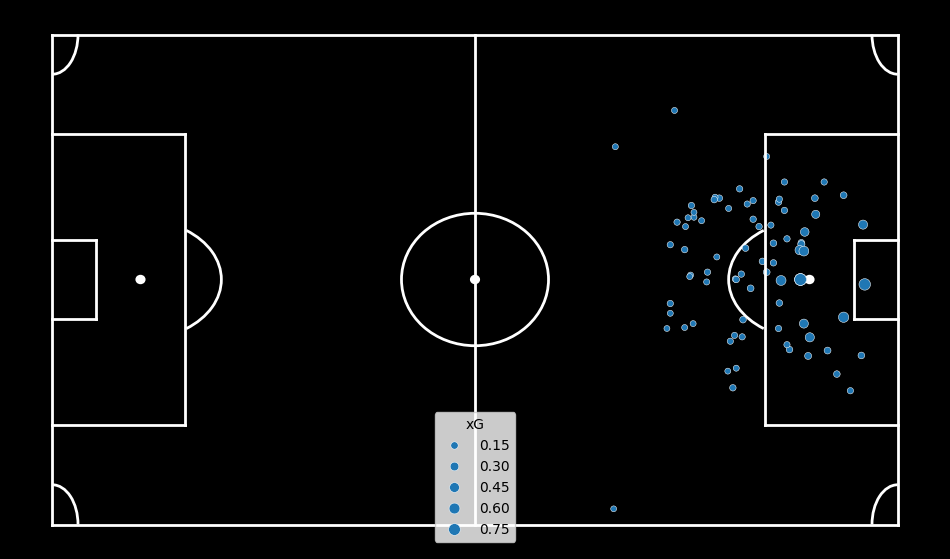

In [87]:
ax1 = pitch(x, y)

sns.scatterplot(x='X', y='Y', data=joint_shots[joint_shots["player"] == "Kevin De Bruyne"], size="xG", ax=ax1)



<Axes: xlabel='X', ylabel='Y'>

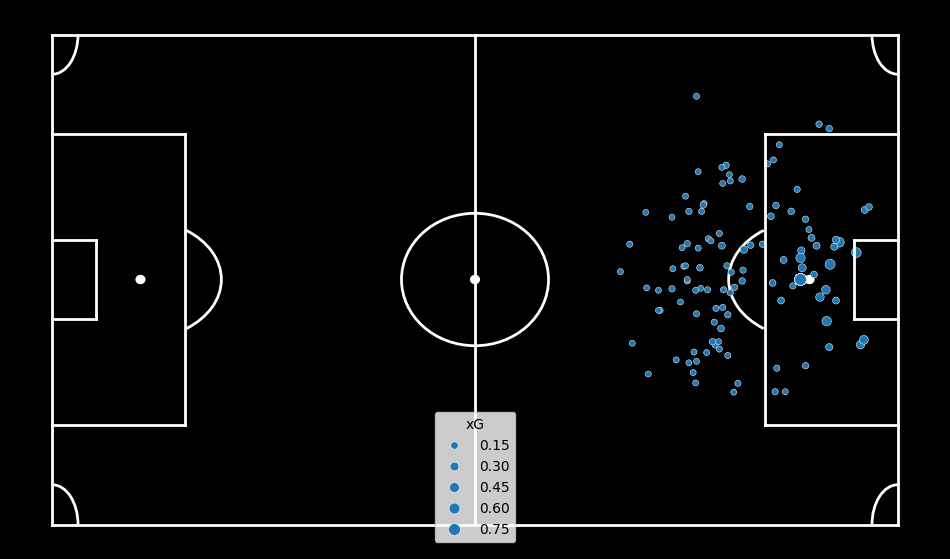

In [88]:
ax2 = pitch(x, y)

sns.scatterplot(x='X', y='Y', data=joint_shots[joint_shots["player"] == "Bruno Fernandes"], size="xG", ax=ax2 )

# shots heat map

In [89]:
colour=sns.color_palette("OrRd_r")

<ipython-input-90-0c0fed6fbb7e>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




AttributeError: PolyCollection.set() got an unexpected keyword argument 'nlevels'

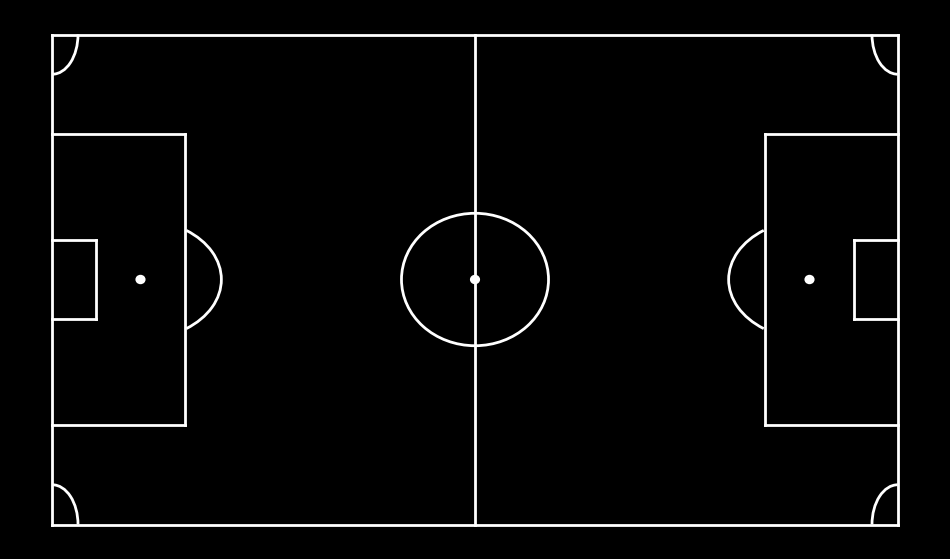

In [90]:
ax3 = pitch(x, y)

sns.kdeplot(x='X', y='Y', data=joint_shots[joint_shots["player"] == "Kevin De Bruyne"], shade= True, nlevels=10 , ax=ax3, pallete=(sns.color_palette("OrRd_r")), title="Kevin De Bruyne" )


<ipython-input-91-25e81ed66d73>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning:

The following kwargs were not used by contour: 'nlevels'



<Axes: xlabel='X', ylabel='Y'>

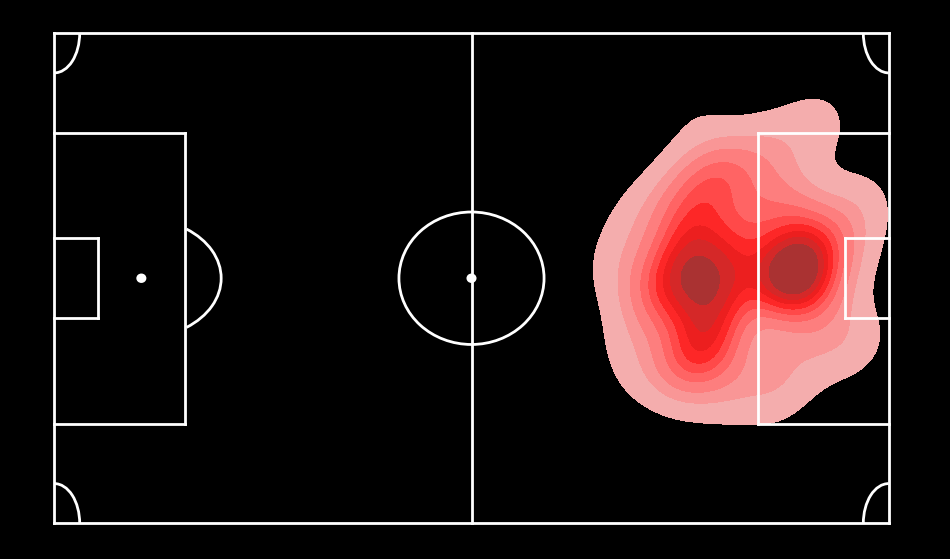

In [91]:
ax4 = pitch(x, y)

sns.kdeplot(x='X', y='Y', data=joint_shots[joint_shots["player"] == "Bruno Fernandes"],shade=True, color="Red",nlevels=10 , ax=ax4)


In [92]:
joint_shots

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,378527,10,SavedShot,0.84985,0.45658,0.049663,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
1,378529,19,Goal,1.01775,0.37000,0.761169,Kevin De Bruyne,a,447,Penalty,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
2,378534,42,SavedShot,1.03845,0.46842,0.244169,Kevin De Bruyne,a,447,OpenPlay,2020,LeftFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,Gabriel Jesus,BallRecovery
3,378546,79,SavedShot,0.76590,0.57054,0.023168,Kevin De Bruyne,a,447,DirectFreekick,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
4,379609,45,MissedShots,0.95335,0.48914,0.042790,Kevin De Bruyne,h,447,OpenPlay,2020,LeftFoot,14112,Manchester City,Leicester,2,5,2020-09-27 15:30:00,Riyad Mahrez,BallRecovery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,423111,42,SavedShot,0.85445,0.33596,0.016029,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
198,423114,51,MissedShots,0.84295,0.35594,0.053285,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
199,423120,66,SavedShot,1.05685,0.59792,0.067309,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
200,423122,73,MissedShots,0.98325,0.20054,0.043397,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


In [93]:
data_with_index = joint_shots.set_index("situation")

In [94]:
data= data_with_index.drop("Penalty")

In [95]:
data

,id,minute,result,X,Y,xG,player,h_a,player_id,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
situation,,,,,,,,,,,,,,,,,,,
DirectFreekick,378527,10,SavedShot,0.84985,0.45658,0.049663,Kevin De Bruyne,a,447,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
OpenPlay,378534,42,SavedShot,1.03845,0.46842,0.244169,Kevin De Bruyne,a,447,2020,LeftFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,Gabriel Jesus,BallRecovery
DirectFreekick,378546,79,SavedShot,0.76590,0.57054,0.023168,Kevin De Bruyne,a,447,2020,RightFoot,14105,Wolverhampton Wanderers,Manchester City,1,3,2020-09-21 19:15:00,None,Standard
OpenPlay,379609,45,MissedShots,0.95335,0.48914,0.042790,Kevin De Bruyne,h,447,2020,LeftFoot,14112,Manchester City,Leicester,2,5,2020-09-27 15:30:00,Riyad Mahrez,BallRecovery
OpenPlay,379620,80,MissedShots,0.93035,0.23606,0.024355,Kevin De Bruyne,h,447,2020,RightFoot,14112,Manchester City,Leicester,2,5,2020-09-27 15:30:00,Ferrán Torres,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FromCorner,423111,42,SavedShot,0.85445,0.33596,0.016029,Bruno Fernandes,h,1228,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
DirectFreekick,423114,51,MissedShots,0.84295,0.35594,0.053285,Bruno Fernandes,h,1228,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
DirectFreekick,423120,66,SavedShot,1.05685,0.59792,0.067309,Bruno Fernandes,h,1228,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard


<ipython-input-96-99436bf7f4cb>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning:

The following kwargs were not used by contour: 'nlevels'



<Axes: xlabel='X', ylabel='Y'>

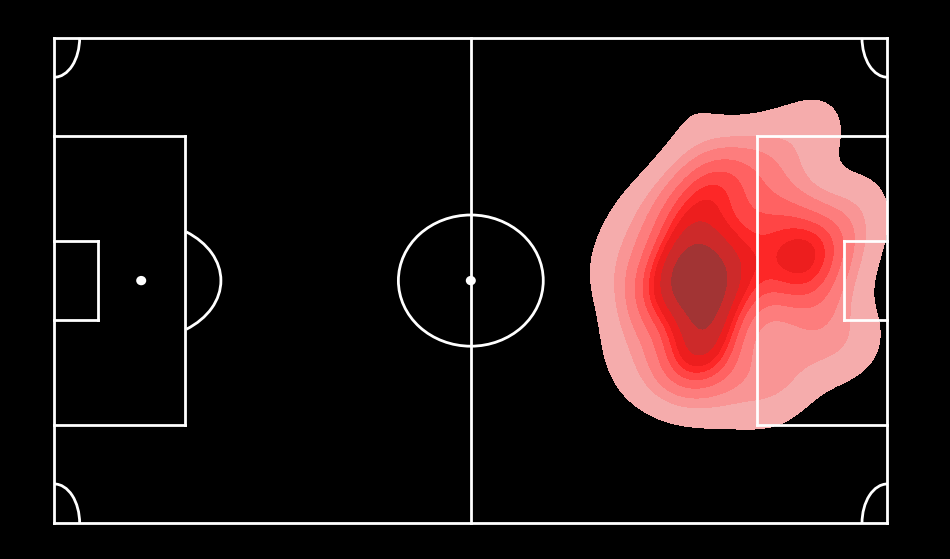

In [96]:
## Heat maps without Penalties
ax7 = pitch(x, y)

sns.kdeplot(x='X', y='Y', data=data[data["player"] == "Bruno Fernandes"],shade=True, color="Red",nlevels=10 , ax=ax7)


<ipython-input-97-305e23f69934>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning:

The following kwargs were not used by contour: 'nlevels'



<Axes: xlabel='X', ylabel='Y'>

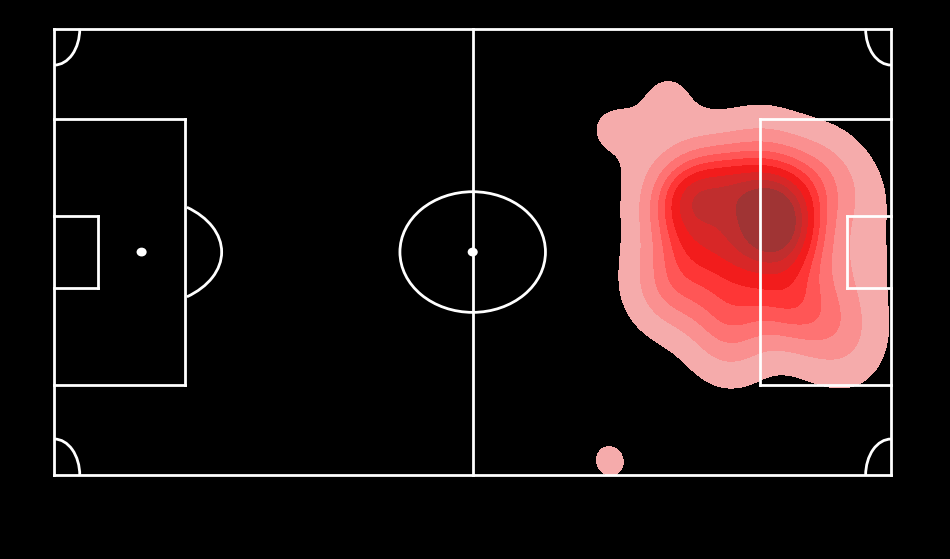

In [97]:
## Heat maps without Penalties
ax8 = pitch(x, y)

sns.kdeplot(x='X', y='Y', data=data_with_index[data_with_index["player"] == "Kevin De Bruyne"],shade=True, color="Red",nlevels=10 , ax=ax8)
